<a href="https://colab.research.google.com/github/ThanikPimpiban/DWDM21/blob/main/Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd #ส่วนของการ Import
import os

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/My Drive/DWDM_Project' #กำหนด path ของโฟลเดอร์ที่ Data อยู่

##ที่มาของข้อมูลสถานีรับส่งผู้โดยสารการรถไฟเเห่งประเทศไทย

https://data.go.th/dataset/station

In [7]:
data_st = pd.read_csv(os.path.join(path,'data_station.csv')) #กำหนดตัวแปร data_st เป็นข้อมูลของสถานีรถไฟแต่ละสถานี
data_st #เรียกดูตารางของสถานีรถไฟแต่ละสถานี

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


##ที่มาของข้อมูลขบวนรถไฟสำหรับรับ-ส่งผู้โดยสาร

https://data.go.th/dataset/train

In [8]:
data_t = pd.read_csv(os.path.join(path,'data_train.csv')) #กำหนดตัวแปร data_t เป็นข้อมูลของรถไฟ
data_t #เรียกดูตารางข้อมูลรถไฟ

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False


##ที่มาของข้อมูล railstation

https://datagov.mot.go.th/dataset/train-station

In [9]:
data_rst = pd.read_csv(os.path.join(path,'railstation_new.csv')) #กำหนดตัวแปร data_rst ให้เป็นรางรถไฟ
data_rst #เรียกดูตารางของรางรถไฟ

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,บ้านเกาะปริง,BAN KO PRING UNMANNED STATION,,ทุ่งสง,NaN,99.644994,8.213274
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


##ที่มาของข้อมูลชื่อตำบล อำเภอ และจังหวัด

https://www.bot.or.th/Thai/Statistics/DataManagementSystem/TempClose/FI_FM1/Code/DocLib_StandardCodeMapping/Location_Postal%20Code.xls

In [10]:
data_location = pd.read_csv(os.path.join(path,'Location_Postal_Code.csv')) ## นำเข้าข้อมูลชื่อตำบล อำเภอ และจังหวัด
data_location ##เรียกดูข้อมูลชื่อตำบล อำเภอ และจังหวัด

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


#ดูว่าข้อมูลมี data missing

In [11]:
data_st.isnull() ##ดูค่า Missing ในตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data_t.isnull() ##ดูค่า Missing ในตาราง data_t

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data_rst.isnull() ##ดูค่า Missing ในตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False


In [14]:
data_location.isnull() ##ดูค่า Missing ในตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7421,False,False,False,False,False
7422,False,False,False,False,False
7423,False,False,False,False,False
7424,False,False,False,False,False


#สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing

In [15]:
data_st.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_st

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short            True
chname              True
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [16]:
data_t.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_t

Zone           False
goback         False
Num            False
IdTrain        False
NameFee        False
StStart        False
NameSt         False
StFinal        False
NameSt_L       False
NameStEng      False
NameStEng_L    False
Service        False
dtype: bool

In [17]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName      True
X           False
Y           False
dtype: bool

In [18]:
data_location.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_location

Location Code    False
จังหวัด          False
เขต/อำเภอ         True
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

#Drop missing value

ลบค่าที่เป็น Missing

In [19]:
data_st = data_st.dropna() ##ลบค่า Missing ในตาราง data_st
data_st ##เรียกดูตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


In [20]:
data_rst = data_rst.dropna() ##ลบค่า Missing ในตาราง data_rst
data_rst ##เรียกดูตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
5,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [21]:
data_location = data_location.dropna() ##ลบค่า Missing ในตาราง data_location
data_location ##เรียกดูตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


#ตรวจสอบเมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่

In [22]:
data_st.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_st หลังการลบค่า Missing

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [23]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst หลังการลบค่า Missing

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName     False
X           False
Y           False
dtype: bool

In [24]:
data_location.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_location หลังการลบค่า Missing

Location Code    False
จังหวัด          False
เขต/อำเภอ        False
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

#Percent of missing data from dropna

เปอร์เซ็นต์ข้อมูลที่สูญเสีย

In [25]:
##ตาราง data_st
st_b = 682
st_a = 679
print(f'before = {st_b} \nafter = {st_a}\nwhich is {100*((st_b-st_a)/st_b)}')

before = 682 
after = 679
which is 0.43988269794721413



จากการคำนวณจะเห็นได้ว่าตาราง data_st มีข้อมูลที่สูญเสีย 0.43 %

In [26]:
##ตาราง data_rst
rst_b = 682
rst_a = 681
print(f'before = {rst_b} \nafter = {rst_a}\nwhich is {100*((rst_b-rst_a)/rst_b)}')

before = 682 
after = 681
which is 0.1466275659824047



จากการคำนวณจะเห็นได้ว่าตาราง data_rst มีข้อมูลที่สูญเสีย 0.14 %

In [27]:
##ตาราง data_location
loca_b = 7426
loca_a = 7425
print(f'before = {loca_b} \nafter = {loca_a}\nwhich is {100*((loca_b-loca_a)/loca_b)}')

before = 7426 
after = 7425
which is 0.013466199838405602



จากการคำนวณจะเห็นได้ว่าตาราง data_location มีข้อมูลที่สูญเสีย 0.01 %

###ทำการเชื่อม 2 ตารางด้วยการ merge 

In [28]:
merged_data_t_data_st = data_st.merge(data_t,how='right',left_on='station_code',right_on='StFinal') #ทำการเชื่อมตาราง 2 ตาราง คือ data_t และ data_st
merged_data_t_data_st #เรียกตารางที่เชื่อมกันของ 2 ตารางข้างต้น

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
1,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
2,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
3,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
4,307,3015,หัวตะเข้,Hua Takhe,หข.,HTK,辉达卡,11,31,-30,30,2,13.72824,100.782581,1,1,1,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,442,4089,ราชบุรี,Rachaburi,รร.,RBR,叻丕府,11,117,-101,101,1,13.53062,99.823915,1,1,0,5,1,20.0,351,ธรรมดา,4002,ธนบุรี,4089,ราชบุรี,Thon Buri,Rachaburi,False
230,535,4238,คีรีรัฐนิคม,Khiri Ratthanikhom,รค.,KRR,开丽拉尼空,41,678,-662,662,3,9.031447,98.9469,1,1,0,5,1,30.0,489,ท้องถิ่น,4239,สุราษฎร์ธานี,4238,คีรีรัฐนิคม,Surat Thani,Khiri Ratthanikhom,False
231,501,4186,ชุมพร,Chumphon,ชพ.,CUP,春蓬府,41,485,-468,468,1,10.503039,99.175829,1,1,0,5,2,17.0,446,ท้องถิ่น,4270,ชุมทางทุ่งสง,4186,ชุมพร,Thung Song Junction,Chumphon,False
232,595,4325,พัทลุง,Phatthalung,พท.,PTL,高頭崙府,42,862,-846,846,1,7.620989,100.085751,1,1,0,5,2,22.0,464,ท้องถิ่น,4432,สุไหงโก-ลก,4325,พัทลุง,Sungai Kolok,Phatthalung,False


###ทำการเชื่อม 3 ตารางเข้าด้วยกัน

In [29]:
merged_3_tables = merged_data_t_data_st.merge(data_rst,how='left',left_on='NameSt_L',right_on='NAMET') #ทำเชื่อมตารางระหว่าง merged_data_t_data_st และ data_rst
merged_3_tables #เรียกดูตารางที่เชื่อมกันทั้ง 3 ตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959
1,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959
2,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,169.0,ชุมทางบางซื่อ,BANG SUE JUNCTION RAILWAY STATION,BANGKOK,บางซื่อ,BANG SUE,100.539150,13.801880
3,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,169.0,ชุมทางบางซื่อ,BANG SUE JUNCTION RAILWAY STATION,BANGKOK,บางซื่อ,BANG SUE,100.539150,13.801880
4,307,3015,หัวตะเข้,Hua Takhe,หข.,HTK,辉达卡,11,31,-30,30,2,13.72824,100.782581,1,1,1,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,158.0,หัวตะเข้,HUA TAKHE RAILWAY STATION,BANGKOK,ลาดกระบัง,LAT KRABANG,100.783373,13.728363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,442,4089,ราชบุรี,Rachaburi,รร.,RBR,叻丕府,11,117,-101,101,1,13.53062,99.823915,1,1,0,5,1,20.0,351,ธรรมดา,4002,ธนบุรี,4089,ราชบุรี,Thon Buri,Rachaburi,False,386.0,ราชบุรี,RATCHABURI RAILWAY STATION,RATCHABURI,เมืองราชบุรี,NA MUEANG,99.823848,13.530993
230,535,4238,คีรีรัฐนิคม,Khiri Ratthanikhom,รค.,KRR,开丽拉尼空,41,678,-662,662,3,9.031447,98.9469,1,1,0,5,1,30.0,489,ท้องถิ่น,4239,สุราษฎร์ธานี,4238,คีรีรัฐนิคม,Surat Thani,Khiri Ratthanikhom,False,583.0,คีรีรัฐนิคม,KHIRI RAT NIKHOM RAILWAY STATION,,คีรีรัฐนิคม,,98.947169,9.031225
231,501,4186,ชุมพร,Chumphon,ชพ.,CUP,春蓬府,41,485,-468,468,1,10.503039,99.175829,1,1,0,5,2,17.0,446,ท้องถิ่น,4270,ชุมทางทุ่งสง,4186,ชุมพร,Thung Song Junction,Chumphon,False,25.0,ชุมพร,CHUMPHON RAILWAY STATION,CHUMPHON,เมืองชุมพร,THA TAPHAO,99.175901,10.502983
232,595,4325,พัทลุง,Phatthalung,พท.,PTL,高頭崙府,42,862,-846,846,1,7.620989,100.085751,1,1,0,5,2,22.0,464,ท้องถิ่น,4432,สุไหงโก-ลก,4325,พัทลุง,Sungai Kolok,Phatthalung,False,47.0,พัทลุง,PHATTHALUNG RAILWAY STATION,PHATTHALUNG,เมืองพัทลุง,KHUHA SAWAN,100.085526,7.621134


###ทำการเชื่อมตารางทั้งหมดเข้าด้วยกัน

In [30]:
merged_4_tables =merged_3_tables.merge(data_location,how='left',left_on='AmpName',right_on='เขต/อำเภอ') #ทำการเชื่อมตาราง merged_3_tables และ data_location
merged_4_tables #เรียกดูตารางที่เชื่อมกันทั้ง 4 ตาราง

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200901.0,ชลบุรี,สัตหีบ,สัตหีบ,20180.0
1,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200902.0,ชลบุรี,สัตหีบ,นาจอมเทียน,20250.0
2,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200903.0,ชลบุรี,สัตหีบ,พลูตาหลวง,20180.0
3,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200904.0,ชลบุรี,สัตหีบ,บางเสร่,20250.0
4,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200905.0,ชลบุรี,สัตหีบ,แสมสาร,20180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700511.0,ราชบุรี,บ้านโป่ง,คุ้งพยอม,70110.0
2170,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700512.0,ราชบุรี,บ้านโป่ง,หนองปลาหมอ,70110.0
2171,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700513.0,ราชบุรี,บ้านโป่ง,เขาขลุง,70110.0
2172,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700514.0,ราชบุรี,บ้านโป่ง,เบิกไพร,70110.0


#ดูค่า missing ของตารางรวม

In [31]:
merged_4_tables.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง merged_4_tables

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
Zone               False
goback             False
Num                False
IdTrain            False
NameFee            False
StStart            False
NameSt             False
StFinal            False
NameSt_L           False
NameStEng          False
NameStEng_L        False
Service            False
OBJECTID            True
NAMET               True
NAMEE               True
ProvName            True
AmpName             True
TamName             True
X                   True
Y                   True
Location Code       True
จังหวัด             True
เขต/อำเภอ           True


# กำจัดค่า Missing

In [32]:
merged_4_tables = merged_4_tables.dropna() #ลบค่า Missing ในตาราง merged_4_tables
merged_4_tables #เรียกดูตาราง merged_4_tables

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200901.0,ชลบุรี,สัตหีบ,สัตหีบ,20180.0
1,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200902.0,ชลบุรี,สัตหีบ,นาจอมเทียน,20250.0
2,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200903.0,ชลบุรี,สัตหีบ,พลูตาหลวง,20180.0
3,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200904.0,ชลบุรี,สัตหีบ,บางเสร่,20250.0
4,331,3047,บ้านพลูตาหลวง,Ban Plu Ta Luang,พต.,BTG,班普塔銮,13,184,-184,184,4,12.704562,100.972436,1,1,0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200905.0,ชลบุรี,สัตหีบ,แสมสาร,20180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700511.0,ราชบุรี,บ้านโป่ง,คุ้งพยอม,70110.0
2170,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700512.0,ราชบุรี,บ้านโป่ง,หนองปลาหมอ,70110.0
2171,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700513.0,ราชบุรี,บ้านโป่ง,เขาขลุง,70110.0
2172,394,4020,ชุมทางหนองปลาดุก,Nong Pla Duk Junction,ปด.,NPJ,农巴杜总站,11,80,-64,64,3,13.817881,99.911146,1,0,0,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,659.0,ชุมทางหนองปลาดุก,NONG PLA DUK JUNCTION RAILWAY STATION,,บ้านโป่ง,,99.911118,13.817960,700514.0,ราชบุรี,บ้านโป่ง,เบิกไพร,70110.0


# **Percent of missing data from dropna**
เปอร์เซ็นต์ข้อมูลที่สูญเสีย

In [33]:
##ตาราง merged_4_tables
merged_4_b = 2174
merged_4_a = 2088
print(f'before = {merged_4_b} \nafter = {merged_4_a}\nwhich is {100*((merged_4_b-merged_4_a)/merged_4_b)}')

before = 2174 
after = 2088
which is 3.9558417663293466



จากการคำนวณจะเห็นได้ว่าตาราง merged_4_tables มีข้อมูลที่สูญเสีย 3.95 %

# ดูค่า Missing รายคอลัมน์

In [34]:
merged_4_tables.isnull().any() ##ดูค่า Missing ของตาราง merged_4_tables

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
Zone               False
goback             False
Num                False
IdTrain            False
NameFee            False
StStart            False
NameSt             False
StFinal            False
NameSt_L           False
NameStEng          False
NameStEng_L        False
Service            False
OBJECTID           False
NAMET              False
NAMEE              False
ProvName           False
AmpName            False
TamName            False
X                  False
Y                  False
Location Code      False
จังหวัด            False
เขต/อำเภอ          False


# challenge
##1.แบ่งกลุ่มข้อมูลที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 5 กลุ่ม
##2.หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด

# แบ่งกลุ่มข้อมูลที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 5 กลุ่ม 
##K-Means

In [66]:
from sklearn.cluster import KMeans  ##import kmaen
import matplotlib.pyplot as plt ##import pyplot

In [88]:
model = KMeans(n_clusters=5)  ## Define จำนวนกลุ่ม cluster
model ## ดู model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
X = merged_4_tables[['X','Y']]  ## กำหนด X ให้เอาค่าในตาราง merged_4_tables ซึ่ง X คือ ลองจิจูด และ Y คือ ละติจูด
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
model.cluster_centers_ #ดู center ของ cluster ที่แบ่งจำนวน 5 กลุ่ม 

array([[102.70933475,  17.30342071],
       [100.94084131,  14.37341299],
       [ 99.96663228,   8.041574  ],
       [104.52319741,  15.13065359],
       [ 99.65709877,  17.86526147]])

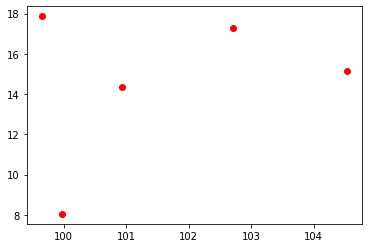

In [91]:
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')  ## plot จุด cluster center ลงในกราฟ

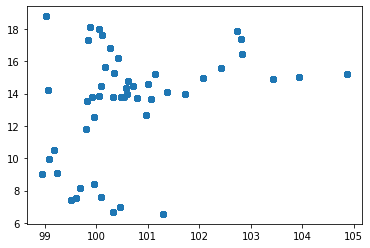

In [92]:
plt.scatter(data=merged_4_tables , x='X',y='Y')  ## plot กราฟ scatter ดูความกระจายของข้อมูล ลองจิจูด และ ละติจูด

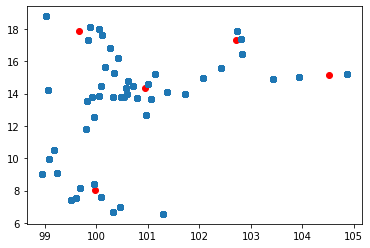

In [93]:
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')   ### ทำการ plot จุด cluster center และ การกระจายของข้อมูล
plt.scatter(data=merged_4_tables , x='X',y='Y')

In [103]:
identified_clusters = model.fit_predict(X)  ## ระบุ cluster ลงในตัวแปร identified_clusters
identified_clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

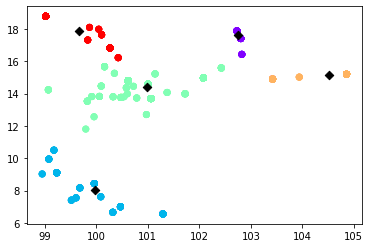

In [105]:
###ทำการเพิ่ม column ชื่อ Cluster ที่ได้ระบุกลุ่มแล้ว ลงในตาราง merged_4_tables
data_with_clusters = merged_4_tables.copy()   
data_with_clusters['Clusters'] = identified_clusters 

## plot กราฟ แสดงกลุ่ม cluster
plt.scatter(data_with_clusters['X'],data_with_clusters['Y'],c=data_with_clusters['Clusters'],cmap='rainbow' ,alpha=0.5)
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='black',alpha=1 ,marker='D')

## **หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด**

In [113]:
data = merged_4_tables[['จังหวัด','NameSt_L','NameFee','StFinal']] ##เลือกคอลัมน์ที่ต้องการ
data ##แสดงข้อมูลของตารางที่เลือก

,จังหวัด,NameSt_L,NameFee,StFinal
0,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
1,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
2,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
3,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
4,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
...,...,...,...,...
2169,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2170,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2171,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2172,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020


In [114]:
Top_Prov = data.groupby('จังหวัด').count().sort_values(by=['StFinal'],ascending=False) ##นำข้อมูล จังหวัด จากตาราง Data โดยพิจารณาจาก StFinal 
Top_Prov  ##เรียกดูตาราง

,NameSt_L,NameFee,StFinal
จังหวัด,,,
อุบลราชธานี,224,224,224
นครราชสีมา,205,205,205
ลพบุรี,161,161,161
ฉะเชิงเทรา,133,133,133
เชียงใหม่,128,128,128
หนองคาย,112,112,112
สระบุรี,98,98,98
นครศรีธรรมราช,90,90,90
พิษณุโลก,80,80,80


In [115]:
Top_Prov.shape ##ดูขนาดของตาราง

(33, 3)

In [116]:
from matplotlib import pyplot as plt  ## เรียกฟังก์ชันในการ Plot กราฟ

In [117]:
Top_Prov.iloc[-33:,1]  ##ตัดคอมลัมน์

จังหวัด
อุบลราชธานี        224
นครราชสีมา         205
ลพบุรี             161
ฉะเชิงเทรา         133
เชียงใหม่          128
หนองคาย            112
สระบุรี             98
นครศรีธรรมราช       90
พิษณุโลก            80
สงขลา               79
กรุงเทพ             76
สุรินทร์            73
สุราษฎร์ธานี        72
ยะลา                56
ปราจีนบุรี          55
นครสวรรค์           44
ชุมพร               43
อุดรธานี            42
นครปฐม              40
ราชบุรี             37
อุตรดิตถ์           34
พระนครศรีอยุธยา     29
ตรัง                29
กาญจนบุรี           21
สุพรรณบุรี          20
แพร่                19
ขอนแก่น             18
สุโขทัย             14
พัทลุง              14
ประจวบคีรีขันธ์     13
พิจิตร              13
ชลบุรี              10
ปทุมธานี             6
Name: NameFee, dtype: int64

# Plot กราฟ

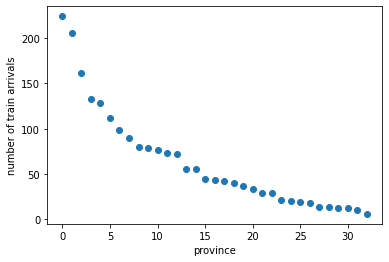

In [40]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1]) ## Plot กราฟ
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

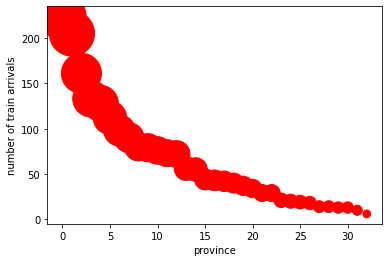

In [41]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=10*Top_Prov.iloc[-33:,1],c=['r'])  ## Plot กราฟ โดยขนาดของจุด*แปรผันตรงกับขนาดของข้อมูล
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

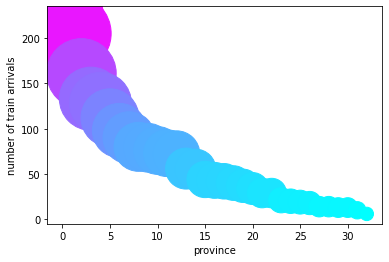

In [42]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=30*Top_Prov.iloc[-33:,1],c=0.5*Top_Prov.iloc[-33:,1],cmap='cool')  ## Plot กราฟ โดยเปลี่ยนสีจุดตามข้อมูล
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

#สรุป

In [43]:
Top_Prov

,NameSt_L,NameFee,StFinal
จังหวัด,,,
อุบลราชธานี,224,224,224
นครราชสีมา,205,205,205
ลพบุรี,161,161,161
ฉะเชิงเทรา,133,133,133
เชียงใหม่,128,128,128
หนองคาย,112,112,112
สระบุรี,98,98,98
นครศรีธรรมราช,90,90,90
พิษณุโลก,80,80,80


จากตารางจะเห็นได้ว่า จังหวัดอุบลราชธานี เป็นจังหวัดที่มีรถไฟขาเข้ามากที่สุด


